In [1]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np

In [2]:
# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = "/Users/jaynam/workspace/playdata/titanic/"

df = pd.read_csv(DATA_PATH+"train.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns = [col.lower() for col in df.columns]

# 타겟 데이터 확인

In [7]:
new_survived = pd.Categorical(df['survived'])
new_survived = new_survived.rename_categories(["Died", "Survived"])

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


new_survived 는 df 의 survived 의 값을 가져와서 카테고리 타입으로 만든다.  
new_survived 의 카테고리 이름을 0, 1 에서 Died, Survived 로 바꿔준다.

In [8]:
# rename 전
new_survived = pd.Categorical(df['survived'])
print(new_survived)

[0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0]
Length: 891
Categories (2, int64): [0, 1]


In [9]:
# rename 후
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived)

['Died', 'Survived', 'Survived', 'Survived', 'Died', ..., 'Died', 'Survived', 'Died', 'Survived', 'Died']
Length: 891
Categories (2, object): ['Died', 'Survived']


# 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
SEED = 42

# train -> 0.8 , test -> 0.2 split
# 8:2 가 국룰이다.
X_train, X_test = train_test_split(df, 
                                   random_state=SEED, 
#                                    train_size = 0.6,
                                   test_size = 0.2)

In [12]:
X_train.shape

(712, 12)

In [13]:
X_test.shape

(179, 12)

In [14]:
SEED = 42

# train -> 0.8 , test -> 0.2 split
X_train, X_test = train_test_split(df, 
                                   random_state=SEED, 
                                   test_size = 0.2)

# index 를 reset 해준다.
# drop = True 로 하게 되면 기존의 인덱스를 drop 하게 된다.
# drop = False 는 기존의 인덱스를 열로 만들어 저장한다.

# inplace 는 원본 파일을 덮어쓰느냐 안쓰느냐의 여부, True = 원본 덮어씀

# X_train = X_train.reset_index(drop=True)
X_train.reset_index(drop=True, inplace=True)

# X_test = X_test.reset_index(drop=True)
X_test.reset_index(drop=True, inplace=True)

X_train.shape, X_test.shape

((712, 12), (179, 12))

원시 데이터를 80% 의 train 데이터로 20% 를 test 데이터로 만든다.  
20% 의 test 데이터는 그대로 두고 80% 의 train 데이터만 EDA 를 진행해야 한다.  

# Data Cleaning

In [15]:
X_train['passengerid'].nunique(), X_train.shape[0]

(712, 712)

In [16]:
# passengerid는 전체 데이터가 unique하기 때문에 삭제
X_train.drop('passengerid', axis=1, inplace=True)
X_test.drop('passengerid', axis=1, inplace=True)

X_train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

# 결측치 제거

In [17]:
X_train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         140
sibsp         0
parch         0
ticket        0
fare          0
cabin       553
embarked      2
dtype: int64

In [18]:
X_train.shape[0]

712

In [19]:
140 / 712

0.19662921348314608

In [20]:
(X_train.isnull().sum() / X_train.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

cabin       0.7767
age         0.1966
embarked    0.0028
survived    0.0000
pclass      0.0000
name        0.0000
sex         0.0000
sibsp       0.0000
parch       0.0000
ticket      0.0000
fare        0.0000
dtype: float64

In [21]:
print(f'before: {X_train.shape} / isnull().sum(): {X_train.isnull().sum().sum()}')

# 결측치가 있는 행 제거 : X_tr.dropna(axis=0)
# train, test 둘다 해줘야 한다. 비교 가능
X_train = X_train.drop('cabin', axis=1)
X_test = X_test.drop('cabin', axis=1)

print(f'after: {X_train.shape} / isnull().sum(): {X_train.isnull().sum().sum()}')

before: (712, 11) / isnull().sum(): 695
after: (712, 10) / isnull().sum(): 142


In [22]:
# age null 값인 부분에 age 의 중간값(median)으로 채운다.
X_train['age'] = X_train['age'].fillna(X_train['age'].median())

# age null 값인 부분에 age 의 중간값(median)으로 채운다.
X_test['age'] = X_test['age'].fillna(X_train['age'].median())

test 데이터는 train 데이터의 median 값으로 채워줘야 한다.

In [23]:
# embarked 의 최빈값을 구한다.
# 최빈값은 빈도가 가장 많은 값을 말한다.
embarked_mode = X_train['embarked'].mode().values[0]
embarked_mode

'S'

embarked 에서 'S' 가 가장 많기 때문에 null 인 부분을 'S' 로 채운다.  

In [24]:
X_train['embarked'] = X_train['embarked'].fillna(embarked_mode)
X_test['embarked'] = X_test['embarked'].fillna(embarked_mode)

In [25]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(0, 0)

결측치 제거  = Data cleaning 가 완료되었다!

# Feature Extraction
> 기존의 feature 에 기반해서 새로운 feature 들을 생성한다.

결측치 제거한 이후의 데이터

총 712  0~ 711  
총 712개  

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   name      712 non-null    object 
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 55.8+ KB


타입이랑 NULL 제거가 되었는지 확인한다.

### 수치형 데이터 타입 변환

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   name      712 non-null    object 
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 55.8+ KB


컬럼 중에서 number 타입인거만 가져온다.  

0   survived  712 non-null    int64  
1   pclass    712 non-null    int64   
4   age       712 non-null    float64  
5   sibsp     712 non-null    int64   
6   parch     712 non-null    int64   
8   fare      712 non-null    float64  

In [28]:
df_num = X_train.select_dtypes(include=np.number)
df_num.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [29]:
df_num.head()

,survived,pclass,age,sibsp,parch,fare
0,0,1,45.5,0,0,28.5000
1,0,2,23.0,0,0,13.0000
2,0,3,32.0,0,0,7.9250
3,0,3,26.0,1,0,7.8542
4,0,3,6.0,4,2,31.2750


In [30]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


In [31]:
df_num.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.376404,2.330056,29.204129,0.553371,0.379213,32.586276
std,0.484824,0.824584,13.007971,1.176404,0.791669,51.969529
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


범주형 데이터는 숫자로 표현하기 힘들다.  
예를 들어 남자는 1 여자는 0 인 경우 숫자로도 표현이 가능하다.   
나이를 20대, 30대 로 구간을 나누어준다면 수치형 데이터가 범주형 데이터로 변환되었다고 보면 된다.  

수치형 123, 421, 32, 123, 421, 3213  11 12 13 -> 10대  
범주형 남자, 여자 / 1등급, 2등급, 3등급  

In [32]:
# survived
X_train['survived'] = X_train['survived'].astype("int32")
X_test['survived'] = X_test['survived'].astype("int32")

In [33]:
# pclass
# number + unique -> 고유한 값인데 -> 수로 나타낸거
# nunique -> 고유한 값의 수
# 1 1 1 2 2 2 3 3 3 -> 1 2 3
X_train['pclass'].unique() # -> 범주형이네?

array([1, 2, 3])

In [35]:
X_train["pclass"] = X_train["pclass"].astype("category")
X_test["pclass"] = X_test["pclass"].astype("category")

In [36]:
# age -> 수치형 데이터
# float64 -> int32

X_train["age"] = X_train["age"].astype("int32")
X_test["age"] = X_test["age"].astype("int32")

In [37]:
# sibsp -> 형제나 배우자의 수
# 항렬 수평 -> 형제, 배우자
# 1 -> 형제 또는 배우자가 1명이 같이 탔다.
# 8 -> 형제 또는 배우자가 8명이 같이 탔다.
# 0 ~ 8 수치형인데 => 범위 어느정도 고정 -> 범주형
X_train['sibsp'].unique()

array([0, 1, 4, 3, 2, 8, 5])

In [38]:
X_train['sibsp'] = X_train['sibsp'].astype('category')
X_test['sibsp'] = X_test['sibsp'].astype('category')

In [39]:
# parch -> 같이 배를 탄 부모나 자식의 수
# 항렬이 수직이야 -> 부모, 조부모, 자식

X_train['parch'].unique()

array([0, 2, 1, 6, 4, 3, 5])

In [40]:
X_train['parch'] = X_train['parch'].astype('category')
X_test['parch'] = X_test['parch'].astype('category')

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    object  
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float64 
 9   embarked  712 non-null    object  
dtypes: category(3), float64(1), int32(2), object(4)
memory usage: 36.4+ KB


In [42]:
X_train['fare'].unique()

array([ 28.5   ,  13.    ,   7.925 ,   7.8542,  31.275 , 247.5208,
        26.55  ,  27.7208,   7.8958,  35.5   ,  24.15  ,  12.275 ,
         7.0542,   9.5   ,  26.    ,  90.    , 227.525 ,  57.    ,
         6.2375,   8.6625,  26.25  ,   9.5875,   7.2292,  22.3583,
         9.4833, 120.    ,  14.4583,   8.05  , 211.5   ,   7.25  ,
         7.725 ,  25.4667,  21.075 ,  30.    ,  61.3792,  20.2125,
        30.5   ,   7.05  ,  14.5   ,   7.5208, 151.55  ,  21.    ,
       262.375 ,   7.75  ,   7.775 ,  80.    ,   9.8417,  12.35  ,
         0.    ,   7.225 ,   6.4375,  12.475 , 133.65  ,   6.975 ,
        77.9583,  10.5   , 106.425 ,  81.8583,  11.1333,  27.75  ,
       153.4625,   8.3   ,  15.05  , 110.8833,  15.0458,  39.6875,
         7.8792,  23.45  ,   7.65  ,  15.7417,  15.2458,  51.8625,
        15.5   ,  41.5792,  14.4542,  10.5167,  20.525 ,  89.1042,
        36.75  ,  55.4417,  50.    ,  13.8625,  16.7   ,  13.5   ,
        35.    ,  55.9   ,   7.8   ,  34.375 ,  18.    ,  47.1

In [43]:
# fare
# float64 -> float32

X_train["fare"] = X_train["fare"].astype("float32")
X_test["fare"] = X_test["fare"].astype("float32")

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    object  
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    object  
dtypes: category(3), float32(1), int32(2), object(4)
memory usage: 33.6+ KB


### 범주형 데이터 타입 변환

In [406]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    object  
 4   age       179 non-null    float64 
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    object  
dtypes: category(3), float32(1), float64(1), int32(1), object(4)
memory usage: 36.4+ KB


3   name         712 non-null    object   
 4   sex          712 non-null    object  
    8   ticket       712 non-null    object   
    10  embarked     712 non-null    object  

In [45]:
df_obj = X_train.select_dtypes(include='object')
df_obj.columns

Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')

In [46]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      712 non-null    object
 1   sex       712 non-null    object
 2   ticket    712 non-null    object
 3   embarked  712 non-null    object
dtypes: object(4)
memory usage: 22.4+ KB


In [47]:
X_train['sex'].unique()

array(['male', 'female'], dtype=object)

In [48]:
# sex
# object -> catogory

X_train['sex'] = X_train['sex'].astype('category')
X_test['sex'] = X_test['sex'].astype('category')

In [49]:
# 범주형
X_train['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [50]:
X_train['embarked'] = X_train['embarked'].astype('category')
X_test['embarked'] = X_test['embarked'].astype('category')

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    category
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    category
dtypes: category(5), float32(1), int32(2), object(2)
memory usage: 24.1+ KB


In [222]:
df_obj.describe()

,name,sex,ticket,embarked
count,712,712,712,712
unique,712,2,558,3
top,"Partner, Mr. Austen",male,CA. 2343,S
freq,1,467,7,527


### 문자열

In [223]:
df_obj = X_train.select_dtypes(include='object')

In [224]:
df_obj.columns

Index(['name', 'ticket'], dtype='object')

In [225]:
df_obj.head()

,name,ticket
0,"Partner, Mr. Austen",113043
1,"Berriman, Mr. William John",28425
2,"Tikkanen, Mr. Juho",STON/O 2. 3101293
3,"Hansen, Mr. Henrik Juul",350025
4,"Andersson, Miss. Ebba Iris Alfrida",347082


In [226]:
df_obj.describe()

,name,ticket
count,712,712
unique,712,558
top,"Partner, Mr. Austen",CA. 2343
freq,1,7


### 공백 제거
> 앞 뒤 공백 제거 : strip()

문자열의 경우 앞 뒤 공백 제거를 기본으로 한다고 생각하면 됨  

lambda x -> X_train['name'][n] = 0, 1, 2, 3, 4,. ....

In [52]:
X_train['name'] = X_train['name'].map(lambda x:x.strip())
X_train['ticket'] = X_train['ticket'].map(lambda x:x.strip())

X_test['name'] = X_test['name'].map(lambda x:x.strip())
X_test['ticket'] = X_test['ticket'].map(lambda x:x.strip())

차이는 없지만 앞 뒤의 공백이 사라진 것

In [62]:
# X_train['name'].map(lambda x: x.split(',')[0])
X_train['name'].map(lambda x: x.split(',')[1].split()[0]).unique()
# X_train['name'].map(lambda x: x.split(',')[1].split()[1])

array(['Mr.', 'Miss.', 'Major.', 'Mrs.', 'Master.', 'Rev.', 'Dr.', 'Col.',
       'Mlle.', 'Capt.', 'Mme.', 'Ms.', 'the', 'Lady.'], dtype=object)

In [63]:
dict_designation = {
    'Mr.': '남성',
    'Master.': '남성',
    'Sir.': '남성',
    'Miss.': '미혼 여성',
    'Mrs.': '기혼 여성',
    'Ms.': '미혼/기혼 여성',
    'Lady.': '숙녀',
    'Mlle.': '아가씨',
    # 직업
    'Dr.': '의사',
    'Rev.': '목사',
    'Major.': '계급',
    'Don.': '교수',
    'Col.': '군인',
    'Capt.': '군인',
    # 귀족
    'Mme.': '영부인',
    'Countess.': '백작부인',
    'Jonkheer.': '귀족'
}

def add_designation(name): # 호칭 함수
    designation = "unknown" # 변수 초기화 아무것도 없으면 unknown
    for key in dict_designation.keys():
        if key in name:
            designation = key
            break
    return designation

# 'designation' 새 컬럼 추가
X_train['designation'] = X_train['name'].map(lambda x: add_designation(x))
X_test['designation'] = X_test['name'].map(lambda x: add_designation(x))

X_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.


In [67]:
X_train['Test1'] = 0

In [68]:
X_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,Test,Test1
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,"Partner, Mr. Austen",0
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,"Berriman, Mr. William John",0
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,"Tikkanen, Mr. Juho",0
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,"Hansen, Mr. Henrik Juul",0
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,"Andersson, Miss. Ebba Iris Alfrida",0


In [69]:
cond = X_train['designation'] == "unknown"
X_train.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,Test,Test1


In [70]:
cond = X_test['designation'] == "unknown"
X_test.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


### 문자열 분리

In [71]:
X_train['last_name'] = X_train['name'].map(lambda x: x.split(',')[0])
X_test['last_name'] = X_test['name'].map(lambda x: x.split(',')[0])

X_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,Test,Test1,last_name
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,"Partner, Mr. Austen",0,Partner
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,"Berriman, Mr. William John",0,Berriman
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,"Tikkanen, Mr. Juho",0,Tikkanen
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,"Hansen, Mr. Henrik Juul",0,Hansen
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,"Andersson, Miss. Ebba Iris Alfrida",0,Andersson


In [233]:
def add_ticket_number(ticket):
    try:
        ticket_split = ticket.split(' ') # 공백으로 구분해서 자름
        return int(ticket_split[-1]) # 마지막 인덱스
    except:
        return 0 # ticket이 LINE인 경우

X_train['ticket_number'] = X_train['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")
X_test['ticket_number'] = X_test['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")

X_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number
0,0,1,"Partner, Mr. Austen",male,28.0,0,0,113043,28.5000,S,Mr.,Partner,113043
1,0,2,"Berriman, Mr. William John",male,31.0,0,0,28425,13.0000,S,Mr.,Berriman,28425
2,0,3,"Tikkanen, Mr. Juho",male,20.0,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293
3,0,3,"Hansen, Mr. Henrik Juul",male,6.0,1,0,350025,7.8542,S,Mr.,Hansen,350025
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,14.0,4,2,347082,31.2750,S,Miss.,Andersson,347082


# 집계

### 피봇 테이블

In [75]:
# 하나의 Feature
# 이런걸 30개

df_pivot = pd.pivot_table(X_train, 
                           index="pclass", # pclass 에 대한
                           values="fare",  # fare 출력
                           aggfunc="mean" # 평균값으로
                         ).reset_index() # 인덱스 초기화, 초기화가 안되겠지?
df_pivot.rename(columns = {'fare' : 'fare_mean_by_pclass'}, inplace=True)
df_pivot.head()

,pclass,fare_mean_by_pclass
0,1,89.253914
1,2,20.575939
2,3,13.934861


pclass 를 왜 썼는지

In [73]:
print(f'before: {X_train.shape}')

# left = X_train, right = df_pivot
# how -> left join
# on -> pclass , 어떤 값을 기준으로
X_train = pd.merge(X_train, df_pivot, how="left", on="pclass")

X_test = pd.merge(X_test, df_pivot, how="left", on="pclass")

print(f'after: {X_train.shape}')

X_train.head()

before: (712, 14)
after: (712, 15)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,Test,Test1,last_name,fare_mean_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,"Partner, Mr. Austen",0,Partner,89.253914
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,"Berriman, Mr. William John",0,Berriman,20.575939
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,"Tikkanen, Mr. Juho",0,Tikkanen,13.934861
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,"Hansen, Mr. Henrik Juul",0,Hansen,13.934861
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,"Andersson, Miss. Ebba Iris Alfrida",0,Andersson,13.934861


### 그룹

In [79]:


# sibsp = 함께 탑승한 형제 또는 배우자 수
# parch = 함께 탑승한 부모 또는 자녀 수

# pclass -> 1, 2, 3
# 어떤 계산을 하던 pclass 를 기준으로 동작
# 평균 -> pclass : 1 group , 2group , 3group 
# pclass 
# 1인 값들의 평균, 고유값, 고유값
# 2인 값들의 평균, 고유값, 고유값
# 3인 값들의 평균, 고유값, 고유값

# groupby("pclass") -> 1인 group , 2인 group , 3인 group 
# 그룹으로 사용해서 만든 내용만 출력이 된다. 출력할 때 pclass (o) / parch (x)

# groupby("survived") -> 0, 1 -> 그룹화
# survived = 0 (그룹1) -> 이 그룹에 대한 계산 평균, 고유값 
# survived = 1 (그룹2) -> 이 그룹에 대한 계산

agg_dict = {"survived" : "mean" , 
            "sibsp" : "nunique", 
            "parch" : "nunique" }

df_groupby = X_train.groupby("pclass").agg(agg_dict).reset_index()

df_groupby.rename(columns = {'survived' : 'survived_by_pclass', 
                             'sibsp' : 'len_sibsp_by_pclass', 
                             'parch' : 'len_parch_by_pclass'}, inplace = True)

df_groupby

,pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,1,0.607362,4,4
1,2,0.483444,4,4
2,3,0.241206,7,7


In [237]:
print(f'before: {X_train.shape}')

X_train = pd.merge(X_train, df_groupby, how="left", on="pclass")
X_test = pd.merge(X_test, df_groupby, how="left", on="pclass")

print(f'after: {X_train.shape}')

X_train.head()

before: (712, 14)
after: (712, 17)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,0,1,"Partner, Mr. Austen",male,28.0,0,0,113043,28.5000,S,Mr.,Partner,113043,89.253914,0.607362,4,4
1,0,2,"Berriman, Mr. William John",male,31.0,0,0,28425,13.0000,S,Mr.,Berriman,28425,20.575939,0.483444,4,4
2,0,3,"Tikkanen, Mr. Juho",male,20.0,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293,13.934861,0.241206,7,7
3,0,3,"Hansen, Mr. Henrik Juul",male,6.0,1,0,350025,7.8542,S,Mr.,Hansen,350025,13.934861,0.241206,7,7
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,14.0,4,2,347082,31.2750,S,Miss.,Andersson,347082,13.934861,0.241206,7,7


In [248]:
pd.crosstab(X_train['survived'],X_train['pclass']).style.background_gradient(cmap='summer_r')

pclass,1,2,3
survived,,,
0,64,78,302
1,99,73,96


1 클래스에 탄 사람이 생존률이 높다.

In [249]:
pd.crosstab(X_train['sibsp'],X_train['pclass']).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,102,97,285
1,54,47,63
2,4,6,13
3,3,1,9
4,0,0,16
5,0,0,5
8,0,0,7


In [250]:
pd.crosstab(X_train['parch'],X_train['pclass']).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,123,110,308
1,24,25,45
2,15,14,38
3,0,2,1
4,1,0,2
5,0,0,3
6,0,0,1


<ipython-input-256-53d84d9c4497>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['pclass']==1].fare,ax=ax[0])
<ipython-input-256-53d84d9c4497>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['pclass']==2].fare,ax=ax[1])
<ipython-input-256-53d84d9c4497>:6: UserWa

<function matplotlib.pyplot.show(close=None, block=None)>

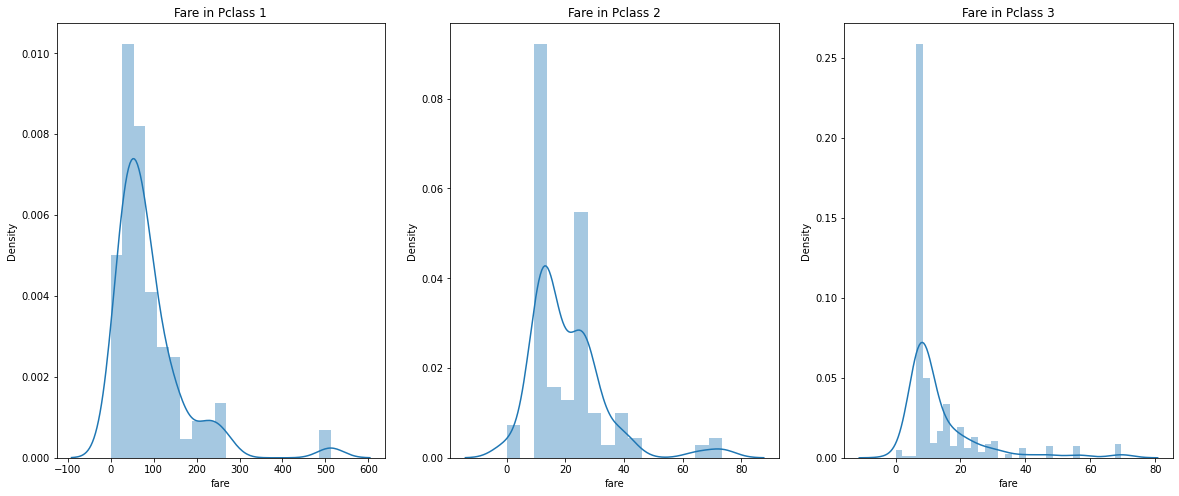

In [256]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(X_train[X_train['pclass']==1].fare,ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(X_train[X_train['pclass']==2].fare,ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(X_train[X_train['pclass']==3].fare,ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show

### 데이터 변환/조합

In [242]:
def sub_age(age):
    return age // 10 # 나이 십의 자리 -> 23 // 10 -> 2 -> 20대..

X_train['sub_age'] = X_train['age'].map(lambda x: sub_age(x))
X_test['sub_age'] = X_test['age'].map(lambda x: sub_age(x))
X_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age
0,0,1,"Partner, Mr. Austen",male,28.0,0,0,113043,28.5000,S,Mr.,Partner,113043,89.253914,0.607362,4,4,2.0
1,0,2,"Berriman, Mr. William John",male,31.0,0,0,28425,13.0000,S,Mr.,Berriman,28425,20.575939,0.483444,4,4,3.0
2,0,3,"Tikkanen, Mr. Juho",male,20.0,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293,13.934861,0.241206,7,7,2.0
3,0,3,"Hansen, Mr. Henrik Juul",male,6.0,1,0,350025,7.8542,S,Mr.,Hansen,350025,13.934861,0.241206,7,7,0.0
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,14.0,4,2,347082,31.2750,S,Miss.,Andersson,347082,13.934861,0.241206,7,7,1.0


In [243]:
def add_sub_embarked(row):
    return str(row['embarked']) + str(row['pclass']) + str(row['sibsp']) + str(row['parch']) 

X_train['sub_embarked'] = X_train.apply(lambda row: add_sub_embarked(row), axis=1)
X_test['sub_embarked'] = X_test.apply(lambda row: add_sub_embarked(row), axis=1)
X_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,sub_embarked
0,0,1,"Partner, Mr. Austen",male,28.0,0,0,113043,28.5000,S,Mr.,Partner,113043,89.253914,0.607362,4,4,2.0,S100
1,0,2,"Berriman, Mr. William John",male,31.0,0,0,28425,13.0000,S,Mr.,Berriman,28425,20.575939,0.483444,4,4,3.0,S200
2,0,3,"Tikkanen, Mr. Juho",male,20.0,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293,13.934861,0.241206,7,7,2.0,S300
3,0,3,"Hansen, Mr. Henrik Juul",male,6.0,1,0,350025,7.8542,S,Mr.,Hansen,350025,13.934861,0.241206,7,7,0.0,S310
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,14.0,4,2,347082,31.2750,S,Miss.,Andersson,347082,13.934861,0.241206,7,7,1.0,S342


# 날짜

In [259]:
DATA_PATH = "/Users/jaynam/workspace/playdata/"

df_ct = pd.read_csv(DATA_PATH+"cinemaTicket_Ref.csv")

In [261]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [263]:
df_ct['datetime'] = pd.to_datetime(df_ct['date'])

In [265]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          142524 non-null  object        
 11  month         142524 non-null  int64         
 12  quarter       142524 non-null  int64         
 13  day           142524 non-null  int64         
 14  datetime      142524 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [267]:
df_ct['datetime'].dt.year[:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: datetime, dtype: int64

In [268]:
df_ct['datetime'].dt.month[:5]

0    5
1    5
2    5
3    5
4    5
Name: datetime, dtype: int64

In [269]:
df_ct['datetime'].dt.day[:5]

0    5
1    5
2    5
3    5
4    5
Name: datetime, dtype: int64

In [271]:
df_ct['datetime'].dt.quarter[:5]

0    2
1    2
2    2
3    2
4    2
Name: datetime, dtype: int64

In [272]:
df_ct['datetime'].dt.weekday[:5]

0    5
1    5
2    5
3    5
4    5
Name: datetime, dtype: int64

In [273]:
df_ct['datetime'].dt.dayofyear[:5]

0    125
1    125
2    125
3    125
4    125
Name: datetime, dtype: int64

In [275]:
df_ct.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,datetime
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,2018-05-05
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,2018-05-05
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,2018-05-05
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,2018-05-05
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,2018-05-05


In [277]:
df_ct.isnull().sum().sum()

250

In [279]:
df_ct.isnull().sum() / df_ct.shape[0]

film_code       0.000000
cinema_code     0.000000
total_sales     0.000000
tickets_sold    0.000000
tickets_out     0.000000
show_time       0.000000
occu_perc       0.000877
ticket_price    0.000000
ticket_use      0.000000
capacity        0.000877
date            0.000000
month           0.000000
quarter         0.000000
day             0.000000
datetime        0.000000
dtype: float64

In [280]:
df_ct.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [287]:
from tqdm.auto import tqdm
import numpy as np

i=0
for i in tqdm(np.random.rand(10000000)):
    i = i**2

  0%|          | 0/10000000 [00:00<?, ?it/s]

Feature 를 누가 많이 만드느냐의 싸움